<a href="https://colab.research.google.com/github/AnuragGorkar/CNN_MNIST_Image_Classification/blob/master/CNN_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONVOLUTIONAL NEURAL NETWORK FOR IMAGE CLASSIFICATION

In [0]:
import pandas as pd
import numpy as np

In [0]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# VISUALIZING DATA




In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
single_image = x_train[0]

In [0]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
single_image.shape

(28, 28)

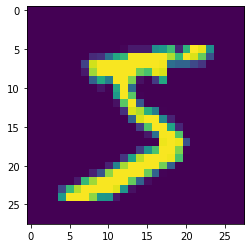

In [0]:
plt.imshow(single_image)

# PRE-PROCESSING THE DATA 

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [0]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
y_example.shape

(60000, 10)

In [0]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
single_image.max()

255

In [0]:
single_image.min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
scaled_single = x_train[0]

In [0]:
scaled_single.max()

1.0

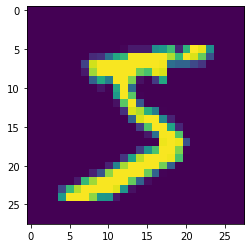

In [0]:
plt.imshow(scaled_single)

# RESHAPING THE DATA 

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
x_test.shape

(10000, 28, 28, 1)

# TRAINING THE MODEL 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0415 - val_acc: 0.9891
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0057 - acc: 0.9980 - val_loss: 0.0513 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0506 - val_acc: 0.9880


# EVALUATE THE MODEL 

In [0]:
model.metrics_names

['loss', 'acc']

In [0]:
losses = pd.DataFrame(model.history.history)

In [0]:
losses.head()

,loss,acc,val_loss,val_acc
0,0.142272,0.957117,0.052441,0.9817
1,0.049435,0.985000,0.037702,0.9880
2,0.032580,0.989433,0.040480,0.9865
3,0.022257,0.992733,0.038297,0.9883


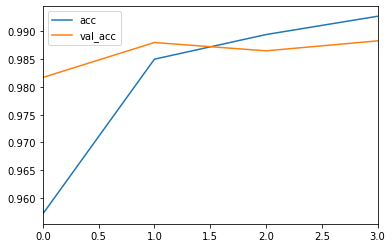

In [0]:
losses[['acc','val_acc']].plot()

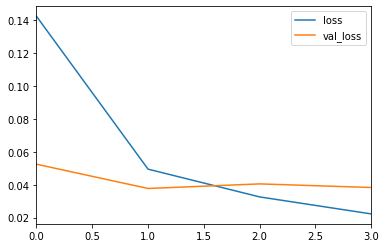

In [0]:
losses[['loss','val_loss']].plot()

In [0]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[0.05060608914161412, 0.988]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(x_test)

In [0]:
y_cat_test.shape

(10000, 10)

In [0]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
predictions[0]

7

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[ 972,    0,    1,    1,    0,    0,    4,    0,    2,    0],
       [   0, 1129,    1,    2,    0,    1,    1,    0,    1,    0],
       [   0,    1, 1017,    4,    2,    0,    2,    4,    2,    0],
       [   0,    0,    1,  998,    0,    9,    0,    0,    1,    1],
       [   0,    0,    0,    0,  970,    0,    2,    0,    0,   10],
       [   1,    0,    0,    2,    0,  888,    1,    0,    0,    0],
       [   5,    1,    0,    0,    2,    5,  943,    0,    2,    0],
       [   0,    2,    6,    0,    0,    0,    0, 1013,    1,    6],
       [   2,    1,    1,    1,    0,    3,    0,    0,  964,    2],
       [   0,    3,    0,    0,    6,    8,    0,    1,    5,  986]])

In [0]:
import seaborn as sns

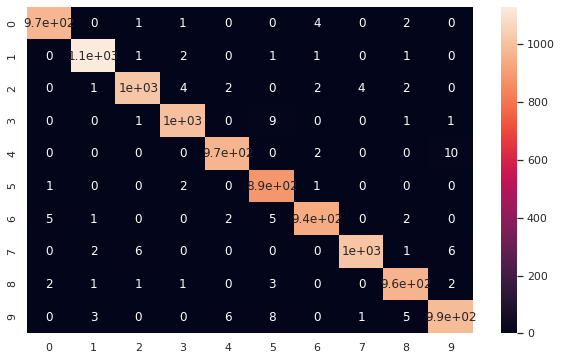

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# TESTING THE MODEL



In [0]:
my_number = x_test[0]

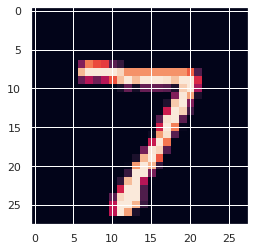

In [0]:
plt.imshow(my_number.reshape(28,28))

In [0]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

In [0]:
my_number = x_test[289]

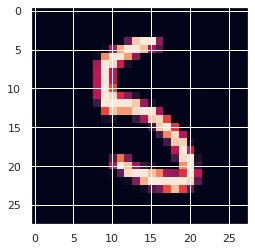

In [0]:
plt.imshow(my_number.reshape(28,28))

In [0]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([5])

In [0]:
my_number = x_test[552]

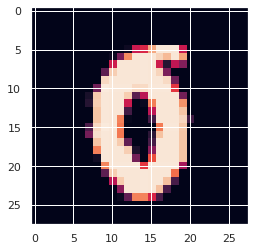

In [0]:
plt.imshow(my_number.reshape(28,28))

In [0]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([0])